In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Hyperparameter Tuning in Python

**Course description**

Building powerful machine learning models depends heavily on the set of hyperparameters used. But with increasingly complex models with lots of options, how do you efficiently find the best settings for your particular problem? In this course you will get practical experience in using some common methodologies for automated hyperparameter tuning in Python using Scikit Learn. These include Grid Search, Random Search & advanced optimization methodologies including Bayesian & Genetic algorithms . You will use a dataset predicting credit card defaults as you build skills to dramatically increase the efficiency and effectiveness of your machine learning model building.


In [3]:
# Import dataset

# https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

data = pd.read_csv('/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

## Hyperparameters and Parameters
In this introductory chapter you will learn the difference between hyperparameters and parameters. You will practice extracting and analyzing parameters, setting hyperparameter values for several popular machine learning algorithms. Along the way you will learn some best practice tips & tricks for choosing which hyperparameters to tune and what values to set & build learning curves to analyze your hyperparameter choices.

### Parameters

#### Extracting a Logistic Regression parameter
This parameter is important for understanding the direction and magnitude of the effect the variables have on the target.

In this exercise we will extract the coefficient parameter (found in the coef_ attribute), zip it up with the original column names, and see which variables had the largest positive effect on the target variable

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg_clf= LogisticRegression()
log_reg_clf.fit(X_train_scaled, y_train)


LogisticRegression()

In [6]:
# Create a list of original variable names from the training DataFrame
original_variables = list(X.columns)

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by=['Coefficient'], axis=0, ascending=False)[0:3]
print(top_three_df)

     Variable  Coefficient
0          ID    -0.009523
1   LIMIT_BAL    -0.108623
2         SEX    -0.047260
3   EDUCATION    -0.073086
4    MARRIAGE    -0.079798
5         AGE     0.069820
6       PAY_0     0.647560
7       PAY_2     0.107988
8       PAY_3     0.095187
9       PAY_4     0.036039
10      PAY_5     0.018025
11      PAY_6     0.025791
12  BILL_AMT1    -0.385028
13  BILL_AMT2     0.144701
14  BILL_AMT3     0.138988
15  BILL_AMT4    -0.009101
16  BILL_AMT5    -0.039434
17  BILL_AMT6     0.018862
18   PAY_AMT1    -0.166385
19   PAY_AMT2    -0.257165
20   PAY_AMT3    -0.050331
21   PAY_AMT4    -0.025079
22   PAY_AMT5    -0.047282
23   PAY_AMT6    -0.047470
     Variable  Coefficient
6       PAY_0     0.647560
13  BILL_AMT2     0.144701
14  BILL_AMT3     0.138988


Nice! You have succesfully extracted and reviewed a very important parameter for the Logistic Regression Model. The coefficients of the model allow you to see which variables are having a larger or smaller impact on the outcome. Additionally the sign lets you know if it is a positive or negative relationship.

#### Extracting a Random Forest parameter

ou will now translate the work previously undertaken on the logistic regression model to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.

This analysis is not as useful as the coefficients of logistic regression as you will be unlikely to ever explore every split and every tree in a random forest model. However, it is a very useful exercise to peek under the hood at what the model is doing.

In this exercise we will extract a single tree from our random forest model, visualize it and programmatically extract one of the splits.

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf_clf.fit(X_train, y_train)

rf_clf.estimators_

[DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=327864320),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1905966857),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1790412168),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1601048271),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1306758565),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1545181819),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1566600923),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1188855677),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1184813036),
 DecisionTreeClassifier(max_depth=2, max_features='au

In [8]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

# Extract the 7th (index 3) tree from the random forest
chosen_tree = rf_clf.estimators_[3]

# Visualize the graph using the provided image
# imgplot = plt.imshow(tree_viz_image)
# plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))


This node split on feature PAY_AMT3, at a value of 26.0


In [9]:
from sklearn import tree

text_representation = tree.export_text(chosen_tree)
print(text_representation)

|--- feature_20 <= 26.00
|   |--- feature_10 <= -0.50
|   |   |--- class: 0.0
|   |--- feature_10 >  -0.50
|   |   |--- class: 1.0
|--- feature_20 >  26.00
|   |--- feature_6 <= 1.50
|   |   |--- class: 0.0
|   |--- feature_6 >  1.50
|   |   |--- class: 1.0



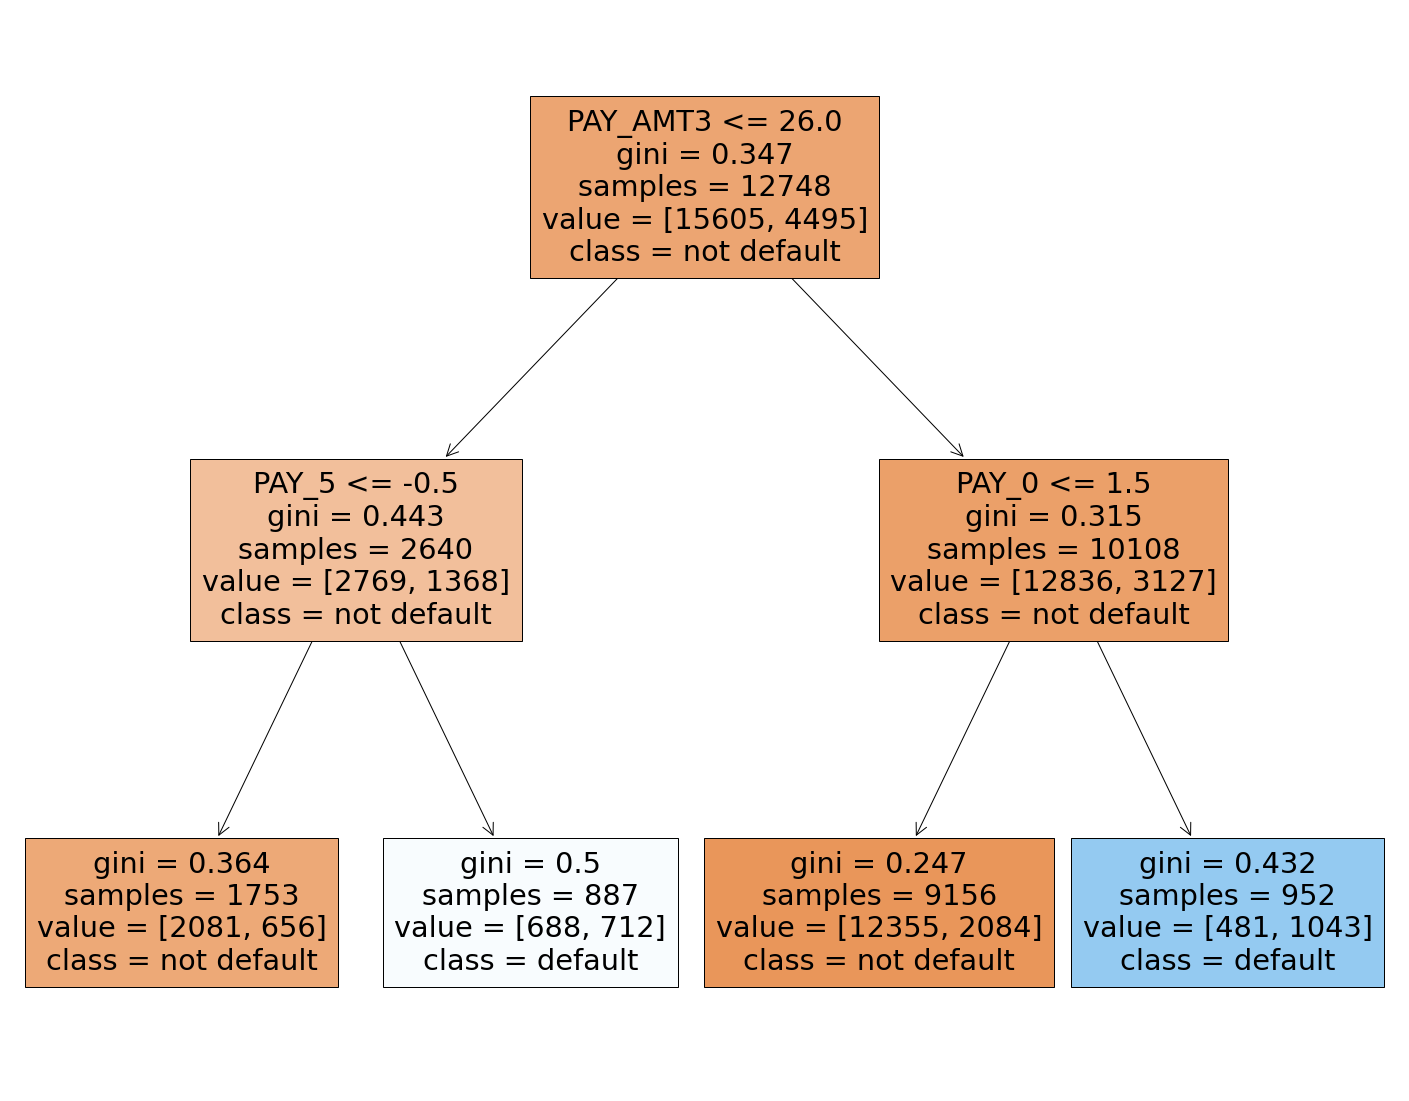

In [10]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(chosen_tree, feature_names=X_train.columns,class_names=["not default", 'default'], filled=True)
plt.show()

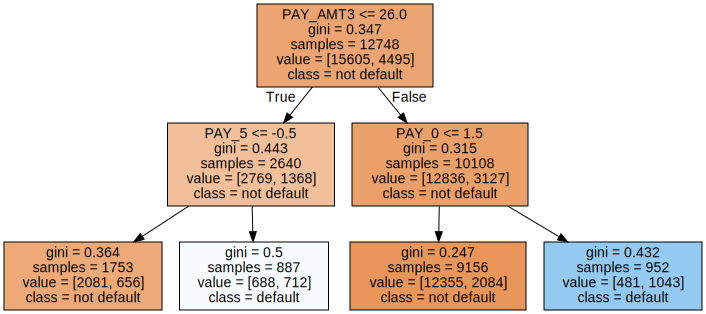

In [11]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(chosen_tree, out_file=None, feature_names=X_train.columns, class_names=["not default", 'default'], filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Excellent! You visualized and extracted some of the parameters of a random forest model.

### Hyperparameters

#### Hyperparameters of KNN

The k-nearest-neighbors algorithm is not as popular as it used to be but can still be an excellent choice for data that has groups of data that behave similarly. Could this be the case for our credit card users?

In this case you will try out several different values for one of the core hyperparameters for the knn algorithm and compare performance.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

The accuracy of 5, 10, 20 neighbours was 0.7483838383838384, 0.7742424242424243, 0.7796969696969697


Phew! You successfully tested 3 different options for 1 hyperparameter, but it was pretty exhausting. Next, we will try to find a way to make this easier.

### Setting & Analyzing Hyperparameter Values 

#### Automating Hyperparameter Choice

Finding the best hyperparameter of interest without writing hundreds of lines of code for hundreds of models is an important efficiency gain that will greatly assist your future machine learning model building.

An important hyperparameter for the GBM algorithm is the learning rate. But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, collating these and viewing them you can find the best one.

Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

   learning_rate  accuracy
0          0.001  0.782020
1          0.010  0.821010
2          0.050  0.822121
3          0.100  0.823232
4          0.200  0.819495
5          0.500  0.812626


Nice! You efficiently tested a few different values for a single hyperparameter and can easily see which learning rate value was the best. Here, it seems that a learning rate of 0.05 or 0.100 yields the best accuracy

#### Building Learning Curves

If we want to test many different values for a single hyperparameter it can be difficult to easily view that in the form of a DataFrame. Previously you learned about a nice trick to analyze this. A graph called a 'learning curve' can nicely demonstrate the effect of increasing or decreasing a particular hyperparameter on the final result.

Instead of testing only a few values for the learning rate, you will test many to easily see the effect of this hyperparameter across a large range of values. A useful function from NumPy is np.linspace(start, end, num) which allows you to create a number of values (num) evenly spread within an interval (start, end) that you specify.

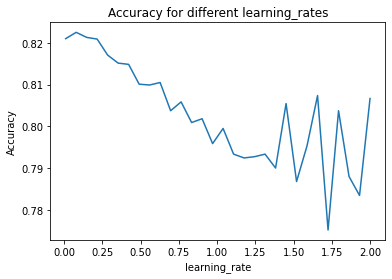

In [14]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
    # Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

Excellent work! You can see that for low values, you get a pretty good accuracy. However once the learning rate pushes much above 1.5, the accuracy starts to drop. You have learned and practiced a useful skill for visualizing large amounts of results for a single hyperparameter.

## Grid Search
This chapter introduces you to a popular automated hyperparameter tuning methodology called Grid Search. You will learn what it is, how it works and practice undertaking a Grid Search using Scikit Learn. You will then learn how to analyze the output of a Grid Search & gain practical experience doing this.

#### Build Grid Search functions
In data science it is a great idea to try building algorithms, models and processes 'from scratch' so you can really understand what is happening at a deeper level. Of course there are great packages and libraries for this work (and we will get to that very soon!) but building from scratch will give you a great edge in your data science work.

In this exercise, you will create a function to take in 2 hyperparameters, build models and return results

In [15]:
# Create the function
def gbm_grid_search(learning_rate, max_depth):

    # Create the model
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)
    
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Return the hyperparameters and score
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

#### Iteratively tune multiple hyperparameters
In this exercise, you will build on the function you previously created to take in 2 hyperparameters, build a model and return the results. You will now use that to loop through some values and then extend this function and loop with another hyperparameter.

In [16]:
# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2, 4, 6]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate,max_depth))

# put results into dataframe
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'max_depth', 'accuracy'])

# Print the results
print(results_df)   

   learning_rate  max_depth  accuracy
0           0.01          2  0.821313
1           0.01          4  0.815051
2           0.01          6  0.814646
3           0.10          2  0.822222
4           0.10          4  0.821616
5           0.10          6  0.819394
6           0.50          2  0.819596
7           0.50          4  0.806364
8           0.50          6  0.785960


In [17]:
# Extend the function input
def gbm_grid_search_extended(learn_rate, max_depth, subsample):

    # Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth, subsample=subsample)
    
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])     

In [18]:
# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2, 4, 6]
subsample_list = [0.4 , 0.6]

for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        # Extend the for loop
        for subsample in subsample_list:
            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
            
# # Print results
# print(results_list)       

# put results into dataframe
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'max_depth', 'subsample', 'accuracy'])

# Print the results
print(results_df) 

    learning_rate  max_depth  subsample  accuracy
0            0.01          2        0.4  0.818081
1            0.01          2        0.6  0.820909
2            0.01          4        0.4  0.815657
3            0.01          4        0.6  0.816061
4            0.01          6        0.4  0.814242
5            0.01          6        0.6  0.814343
6            0.10          2        0.4  0.821919
7            0.10          2        0.6  0.822121
8            0.10          4        0.4  0.821313
9            0.10          4        0.6  0.820909
10           0.10          6        0.4  0.814040
11           0.10          6        0.6  0.817576
12           0.50          2        0.4  0.814646
13           0.50          2        0.6  0.817677
14           0.50          4        0.4  0.792222
15           0.50          4        0.6  0.798889
16           0.50          6        0.4  0.778182
17           0.50          6        0.6  0.768586


Congratulations. You have effectively built your own grid search! You went from 2 to 3 hyperparameters and can see how you could extend that to even more values and hyperparameters. That was a lot of effort though. Be warned - we are now entering a world that can get very computationally expensive very fast!

### GridSearchCV with Scikit Learn 

In [19]:
# some handy code for n_jobs hyperparameter
import os
print(os.cpu_count())

4


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parameter grid
param_grid = {'max_depth': [2, 4, 8, 15], 'max_features': ['auto','sqrt']} 

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True)

grid_rf_class.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')

#### Exploring grid search results
You will now explore the cv_results_ property of the GridSearchCV object. This is a dictionary that we can read into a pandas DataFrame and contains a lot of useful information about the grid search we just undertook.

A reminder of the different column types in this property:

- time_ columns
- param_ columns (one for each hyperparameter) and the singular params column (with all hyperparameter settings)
- a train_score column for each cv fold including the mean_train_score and std_train_score columns
- a test_score column for each cv fold including the mean_test_score and std_test_score columns
- a rank_test_score column with a number from 1 to n (number of iterations) ranking the rows based on their mean_test_score

In [21]:
# Read the cv_results property into a dataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
display(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ['params']]
display(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1 ]
display(best_row)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.409308,0.010010,0.043330,0.001644,2,auto,"{'max_depth': 2, 'max_features': 'auto'}",0.773185,0.768470,0.782583,...,0.767338,0.010153,8,0.768745,0.771227,0.767548,0.771991,0.774588,0.770820,0.002480
1,1.372729,0.049563,0.042444,0.002065,2,sqrt,"{'max_depth': 2, 'max_features': 'sqrt'}",0.774318,0.769078,0.782468,...,0.767616,0.010428,7,0.768755,0.771712,0.766741,0.774790,0.772902,0.770980,0.002887
2,2.377955,0.031699,0.048312,0.002075,4,auto,"{'max_depth': 4, 'max_features': 'auto'}",0.777625,0.776138,0.788529,...,0.772917,0.010587,6,0.778136,0.780775,0.777095,0.781274,0.782544,0.779965,0.002030
3,2.548110,0.133497,0.057689,0.020050,4,sqrt,"{'max_depth': 4, 'max_features': 'sqrt'}",0.778424,0.777511,0.790563,...,0.773500,0.011573,5,0.779396,0.780649,0.776829,0.782159,0.783372,0.780481,0.002268
4,4.291653,0.064865,0.067586,0.005669,8,auto,"{'max_depth': 8, 'max_features': 'auto'}",0.786523,0.782786,0.795005,...,0.780919,0.009690,1,0.832725,0.832460,0.832894,0.838364,0.835649,0.834419,0.002285
5,4.218529,0.042712,0.064658,0.003966,8,sqrt,"{'max_depth': 8, 'max_features': 'sqrt'}",0.786642,0.780410,0.795529,...,0.779793,0.010624,2,0.833378,0.832109,0.834217,0.835531,0.834462,0.833939,0.001145
6,6.806612,0.051103,0.100265,0.008200,15,auto,"{'max_depth': 15, 'max_features': 'auto'}",0.785544,0.780523,0.787234,...,0.778390,0.007745,3,0.975725,0.976629,0.978029,0.976471,0.976738,0.976719,0.000745
7,6.429306,0.356992,0.090570,0.005002,15,sqrt,"{'max_depth': 15, 'max_features': 'sqrt'}",0.784562,0.780929,0.786211,...,0.777902,0.007546,4,0.976036,0.977851,0.978698,0.975818,0.976681,0.977017,0.001099


,params
0,"{'max_depth': 2, 'max_features': 'auto'}"
1,"{'max_depth': 2, 'max_features': 'sqrt'}"
2,"{'max_depth': 4, 'max_features': 'auto'}"
3,"{'max_depth': 4, 'max_features': 'sqrt'}"
4,"{'max_depth': 8, 'max_features': 'auto'}"
5,"{'max_depth': 8, 'max_features': 'sqrt'}"
6,"{'max_depth': 15, 'max_features': 'auto'}"
7,"{'max_depth': 15, 'max_features': 'sqrt'}"


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,4.291653,0.064865,0.067586,0.005669,8,auto,"{'max_depth': 8, 'max_features': 'auto'}",0.786523,0.782786,0.795005,...,0.780919,0.00969,1,0.832725,0.83246,0.832894,0.838364,0.835649,0.834419,0.002285


#### Analyzing the best results
At the end of the day, we primarily care about the best performing 'square' in a grid search. Luckily Scikit Learn's gridSearchCv objects have a number of parameters that provide key information on just the best square (or row in cv_results_).

Three properties you will explore are:

- best_score_ – The score (here ROC_AUC) from the best-performing square.
- best_index_ – The index of the row in cv_results_ containing information on the best-performing square.
- best_params_ – A dictionary of the parameters that gave the best score, for example 'max_depth': 10

In [22]:
# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
display(best_row)

# Get the max_depth parameter from the best-performing square and print
best_n_estimators = grid_rf_class.best_params_["max_depth"]
display(best_n_estimators)

0.7809189857911946


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,4.291653,0.064865,0.067586,0.005669,8,auto,"{'max_depth': 8, 'max_features': 'auto'}",0.786523,0.782786,0.795005,...,0.780919,0.00969,1,0.832725,0.83246,0.832894,0.838364,0.835649,0.834419,0.002285


8

#### Using the best results
While it is interesting to analyze the results of our grid search, our final goal is practical in nature; we want to make predictions on our test set using our estimator object.

We can access this object through the best_estimator_ property of our grid search object.

Let's take a look inside the best_estimator_ property, make predictions, and generate evaluation scores. We will firstly use the default predict (giving class predictions), but then we will need to use predict_proba rather than predict to generate the roc-auc score as roc-auc needs probability scores for its calculation. We use a slice [:,1] to get probabilities of the positive class

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# See what type of object the best_estimator_ property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix 
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0 0 0 0 0]
Confusion Matrix 
 [[7373  369]
 [1394  764]]
ROC-AUC Score 
 0.7776063317714551


## Random Search

#### Randomly Sample Hyperparameters

To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.

In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

You will use just the hyperparameters learning_rate and min_samples_leaf of the GBM algorithm to keep the example illustrative and not overly complicated.

In [24]:
from itertools import product # Cartesian Product

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
display(combinations_random_chosen[:10])

[[0.46673366834170854, 13],
 [0.24959798994974874, 34],
 [1.2678894472361808, 37],
 [1.200502512562814, 40],
 [0.039949748743718594, 31],
 [1.0357788944723618, 15],
 [0.5266331658291458, 19],
 [0.7737185929648241, 31],
 [1.222964824120603, 13],
 [0.7362814070351759, 25]]

#### Randomly Search with Random Forest
To solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.

As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters criterion, max_depth and max_features of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

You will use a slightly different package for sampling in this task, random.sample().

In [25]:
import random

# Create lists for criterion and max_features
criterion_list = ['gini','entropy']
max_feature_list = ["auto", "sqrt", "log2"]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3,56))

# Combination list
combinations_list_2 = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list_2, 150)

# Print the result
display(combinations_random_chosen[:10])

[['gini', 'sqrt', 50],
 ['entropy', 'auto', 13],
 ['gini', 'log2', 19],
 ['entropy', 'sqrt', 32],
 ['entropy', 'log2', 47],
 ['gini', 'log2', 50],
 ['gini', 'sqrt', 22],
 ['gini', 'auto', 29],
 ['entropy', 'auto', 9],
 ['gini', 'sqrt', 5]]

#### Visualizing a Random Search
Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.

In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.

The function sample_and_visualize_hyperparameters() takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations.

If you want to see the function definition, you can use Python's handy inspect library, like so:

print(inspect.getsource(sample_and_visualize_hyperparameters))

In [26]:
def sample_and_visualize_hyperparameters(n_samples):

    # If asking for all combinations, just return the entire list.
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
    else:
        combinations_random_chosen = []
        random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
        combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
    # Pull out the X and Y to plot
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

    # Plot 
    plt.clf() 
    plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    # plt.gca().set_xlim(x_lims)
    # plt.gca().set_ylim(y_lims)
    plt.show()

In [27]:
#Handy code
import inspect

print(inspect.getsource(gbm_grid_search_extended))

def gbm_grid_search_extended(learn_rate, max_depth, subsample):

    # Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth, subsample=subsample)
    
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])     



6200


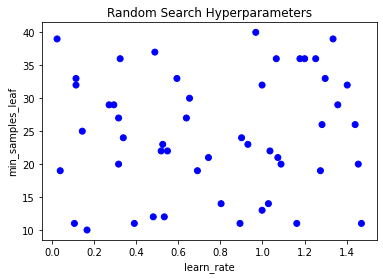

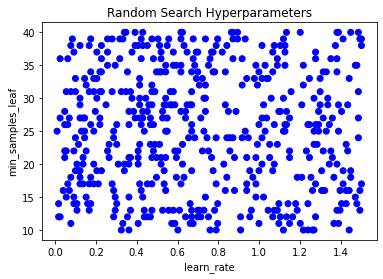

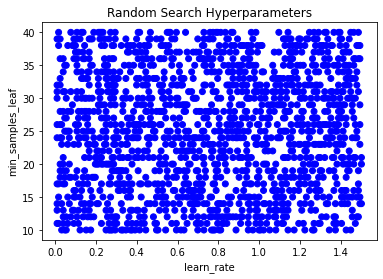

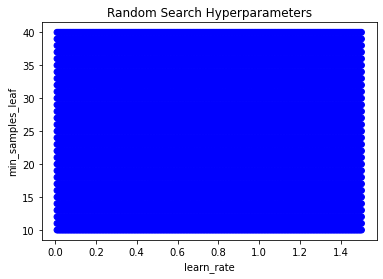

In [28]:
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

Those were some great viz you produced! Notice how the bigger your sample space of a random search the more it looks like a grid search?

### Random Search in Scikit Learn

#### The RandomizedSearchCV Object
Just like the GridSearchCV library from Scikit Learn, RandomizedSearchCV provides many useful features to assist with efficiently undertaking a random search. You're going to create a RandomizedSearchCV object, making the small adjustment needed from the GridSearchCV object.

The desired options are:

- A default Gradient Boosting Classifier Estimator
- 5-fold cross validation
- Use accuracy to score the models
- Use 4 cores for processing in parallel
- Ensure you refit the best model and return training scores
- Randomly sample 10 models
- The hyperparameter grid should be for learning_rate (150 values between 0.1 and 2) and min_samples_leaf (all values between and including 20 and 64)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 150), 'min_samples_leaf': list(range(20, 65))} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,
    n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[0.5335570469798657 1.7704697986577183 1.4516778523489933
 0.15100671140939598 0.32953020134228184 1.0436241610738255
 1.3751677852348994 1.5919463087248322 0.3805369127516779
 0.7503355704697986]
[40 45 55 52 64 28 20 43 55 61]


Great work! You have succesfully taken the knowledge gained from the grid search section and adjusted it to be able to run a random search. This is a very valuable tool to add to your Machine Learning Toolkit!

#### RandomSearchCV in Scikit Learn
Let's practice building a RandomizedSearchCV object using Scikit Learn.

The hyperparameter grid should be for max_depth (all values between and including 5 and 25) and max_features ('auto' and 'sqrt').

The desired options for the RandomizedSearchCV object are:

- A RandomForestClassifier Estimator with n_estimators of 80.
- 3-fold cross validation (cv)
- Use roc_auc to score the models
- Use 4 cores for processing in parallel (n_jobs)
- Ensure you refit the best model and return training scores
- Only sample 5 models for efficiency (n_iter)

Remember, to extract the chosen hyperparameters these are found in cv_results_ with a column per hyperparameter. For example, the column for the hyperparameter criterion would be param_criterion.

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

[9 21 13 22 12]
['sqrt' 'sqrt' 'auto' 'sqrt' 'auto']


### Comparing Grid and Random Search

#### Grid and Random Search Side by Side

Visualizing the search space of random and grid search together allows you to easily see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.

In [31]:
from itertools import product # Cartesian Product

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,400))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

In [32]:
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
    grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
    rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

    # Plot all together
    plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
#     plt.gca().set_xlim(x_lims)
#     plt.gca().set_ylim(y_lims)
    plt.show()

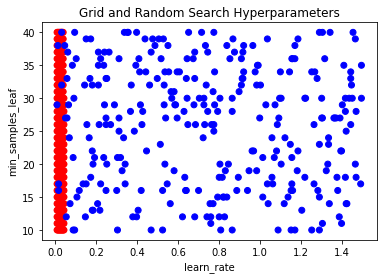

In [33]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)

You can really see how a grid search will cover a small area completely whilst random search will cover a much larger area but not completely

## Informed Search

In this final chapter you will be given a taste of more advanced hyperparameter tuning methodologies known as ''informed search''. This includes a methodology known as Coarse To Fine as well as Bayesian & Genetic hyperparameter tuning algorithms. You will learn how informed search differs from uninformed search and gain practical skills with each of the mentioned methodologies, comparing and contrasting them as you go.

### Informed Search: Coarse to Fine

### Visualizing Coarse to Fine
You're going to undertake the first part of a Coarse to Fine search. This involves analyzing the results of an initial random search that took place over a large search space, then deciding what would be the next logical step to make your hyperparameter search finer.

In [34]:
from itertools import product # Cartesian Product

max_depth_list = list(range(1, 65))
min_samples_list = list(range(3, 17))
learn_rate_list = np.linspace(0.01, 2, 150)

combinations_list = [list(x) for x in product(max_depth_list, min_samples_list, learn_rate_list)]
print(len(combinations_list))

134400


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'max_depth': max_depth_list, 'min_samples_leaf': min_samples_list, 'learning_rate': learn_rate_list} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,
    n_iter = 500,
    scoring='accuracy', n_jobs=-1, cv = 2, refit=False, return_train_score = False)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
# print(random_GBM_class.cv_results_['param_learning_rate'])
# print(random_GBM_class.cv_results_['param_min_samples_leaf'])

In [ ]:
print(random_GBM_class.cv_results_['param_learning_rate'])

In [ ]:
cv_results_df = pd.DataFrame(random_GBM_class.cv_results_)

In [ ]:
results_df = cv_results_df[['param_max_depth', 'param_min_samples_leaf', 'param_learning_rate', 'mean_test_score', 'rank_test_score']]

In [ ]:
def visualize_hyperparameter(name):
    plt.clf()
    plt.scatter(results_df[name],results_df['rank_test_score'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    plt.show()

In [ ]:
visualize_hyperparameter('param_max_depth')

In [ ]:
visualize_hyperparameter('param_min_samples_leaf')

In [ ]:
print(results_df.sort_values(by='rank_test_score', ascending=False).head(10))

In [ ]:
print(results_df.sort_values(by='rank_test_score', ascending=True).head(10))